In [4]:
# Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
# create dataframework for the dataset
golf_df = pd.read_csv("Golf_Gaming.csv")
golf_df

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [5]:
import numpy as np

# Replace '?' with NaN
# remove the ? mark to avoid any issues in the analysis
golf_df.replace("?", np.nan, inplace=True)

# Display missing values
# Find out the missing values
# Counts the missing values
print(golf_df.isna().sum())

# dtype at the end is array of the sum

Day            0
Outlook        0
Temperature    0
Humidity       0
Wind           0
Play Golf      1
dtype: int64


In [9]:
# Drop the 'Day' column since it is not numerical
# Day means nothing, non numerical, and unique through out

# inplace=True, if you dont put, what ever you put will stay in
# Remove the item from the golf array 
golf_df.drop(columns=['Day'], inplace=True)

### Exploring the data framework with describe() method to help us understand the dataset more

In [10]:
# Gives us a general over view of the entire dataset
# Stats in the diffferent columns, 
# whether there is normality or even distribution
golf_df.describe()

,Outlook,Temperature,Humidity,Wind,Play Golf
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1.058824,1.058824,1.000000,0.588235,0.705882
std,0.826936,0.826936,0.935414,0.507300,0.587868
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,1.000000,2.000000


In [11]:
# Convert categorical features to numerical values.



# Bse temp is high, low, mild


# Categorical e.g Time in hours, how often is this information repeating
# Repeating less than 20% is Categorical - Unique variables, Quality
# Continuos Data - Measured e.g Temperature, Distance


# Encoding 
# Dealing with categerical variables with no order
# Hot, Low, Sunny for Temp - To give it numbers 
# Mapping Text lables to numbers

# For loop
# Randomly assigns them for us
# Decode for later



from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Golf']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    golf_df[col] = le.fit_transform(golf_df[col])
    label_encoders[col] = le  # Store encoders for later use

# Check transformed data
print(golf_df.head())


   Outlook  Temperature  Humidity  Wind  Play Golf
0        2            1         0     1          0
1        2            1         0     0          0
2        0            1         0     1          1
3        1            2         0     1          1
4        1            0         2     1          1


###  The Heat Map below shows a matrix where the values in the matrix are represented by colors which helps us to visualize the relationship between multiple variables in a dataset.
### The heatmap shows the correlation coefficients between each pair of variables which are measure of the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), and 0 indicating no correlation

              Outlook  Temperature      Humidity          Wind  Play Golf
Outlook      1.000000     0.086022 -8.079863e-02  6.134689e-02  -0.605020
Temperature  0.086022     1.000000 -4.847918e-01  6.134689e-02  -0.090753
Humidity    -0.080799    -0.484792  1.000000e+00 -5.849000e-17   0.340971
Wind         0.061347     0.061347 -5.849000e-17  1.000000e+00   0.197245
Play Golf   -0.605020    -0.090753  3.409713e-01  1.972455e-01   1.000000


Text(0.5, 1.0, 'Correlation Heatmap with Encoded Categorical Data')

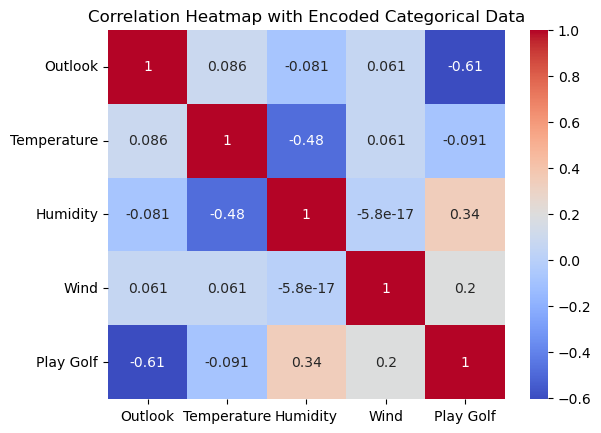

In [15]:
# visualising the corelation

# Find the coorelation of these varibles in the data set
# Each variable been compared with the other
# Focus on the aspect of whether someone is playing gofl or not

# From out mathematics, person's formular/method used to measure coorelation
# Find out how the diffferent columns relate to each other, in a positive or negative way

# Min of 500 rows

# Heatmap simply visualised the correlation


# Computing the correlation matrix
corr_matrix = golf_df.corr()

# Printing the correlation matrix
print(corr_matrix)

# Creating a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with Encoded Categorical Data")


# Expoonetional 
# To a power 2



## To convert the values in the "Day" column to continuous data rather than categorical data, we did the following;
1 . Remove the first character from all values in the "Day" column so since the following characters are numeric thereby making all the values continuous

In [5]:
# Load dataset
golf_df1 = pd.read_csv("Golf_Gaming.csv")

In [6]:
golf_df1.head()

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [7]:
# make Day Column continuous by removing first character
golf_df1['Day'] = golf_df1['Day'].str[1:]
golf_df1


,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [8]:
# Check unique values in Humidity column
golf_df1["Humidity"].unique()

array(['High', 'Normal', 'Low'], dtype=object)

In [9]:
# Make Wind Column contiunous data  
golf_df1["Humidity"].replace(["Low", "Normal", "High"], [0, 1, 2], inplace=True)
golf_df1

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,1,Sunny,Hot,2,Weak,No
1,2,Sunny,Hot,2,Strong,No
2,3,Overcast,Hot,2,Weak,Yes
3,4,Rain,Mild,2,Weak,Yes
4,5,Rain,Cool,1,Weak,Yes
5,6,Rain,Cool,1,Strong,No
6,7,Overcast,Cool,1,Strong,Yes
7,8,Sunny,Mild,2,Weak,No
8,9,Sunny,Cool,1,Weak,Yes
9,10,Rain,Mild,1,Weak,Yes


In [10]:
# Check unique values in Wind column
golf_df1["Wind"].unique()

array(['Weak', 'Strong'], dtype=object)

In [11]:
# Make Wind Column contiunous data  
golf_df1["Wind"].replace(["Weak", "Strong"], [0, 1], inplace=True)
golf_df1

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,1,Sunny,Hot,2,0,No
1,2,Sunny,Hot,2,1,No
2,3,Overcast,Hot,2,0,Yes
3,4,Rain,Mild,2,0,Yes
4,5,Rain,Cool,1,0,Yes
5,6,Rain,Cool,1,1,No
6,7,Overcast,Cool,1,1,Yes
7,8,Sunny,Mild,2,0,No
8,9,Sunny,Cool,1,0,Yes
9,10,Rain,Mild,1,0,Yes


In [12]:
# Check unique values in Temperature column
golf_df1["Temperature"].unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [13]:
# Make Temperature Column contiunous data  
golf_df1["Temperature"].replace(["Hot", "Mild", "Cool"], [0, 1, 2], inplace=True)
golf_df1

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,1,Sunny,0,2,0,No
1,2,Sunny,0,2,1,No
2,3,Overcast,0,2,0,Yes
3,4,Rain,1,2,0,Yes
4,5,Rain,2,1,0,Yes
5,6,Rain,2,1,1,No
6,7,Overcast,2,1,1,Yes
7,8,Sunny,1,2,0,No
8,9,Sunny,2,1,0,Yes
9,10,Rain,1,1,0,Yes


In [14]:
# Check unique values in Outlook column
golf_df1["Outlook"].unique()

array(['Sunny', 'Overcast', 'Rain'], dtype=object)

In [15]:
# Make Outlook Column contiunous data  
golf_df1["Outlook"].replace(["Sunny", "Overcast", "Rain"], [0, 1, 2], inplace=True)
golf_df1

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,1,0,0,2,0,No
1,2,0,0,2,1,No
2,3,1,0,2,0,Yes
3,4,2,1,2,0,Yes
4,5,2,2,1,0,Yes
5,6,2,2,1,1,No
6,7,1,2,1,1,Yes
7,8,0,1,2,0,No
8,9,0,2,1,0,Yes
9,10,2,1,1,0,Yes


In [16]:
# Drop last last row since it has null values 
golf_df1 = golf_df1.drop([16])
golf_df1

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,1,0,0,2,0,No
1,2,0,0,2,1,No
2,3,1,0,2,0,Yes
3,4,2,1,2,0,Yes
4,5,2,2,1,0,Yes
5,6,2,2,1,1,No
6,7,1,2,1,1,Yes
7,8,0,1,2,0,No
8,9,0,2,1,0,Yes
9,10,2,1,1,0,Yes


In [17]:
# Generate the predictor input

X = golf_df1.drop(columns=["Play Golf"])
X

,Day,Outlook,Temperature,Humidity,Wind
0,1,0,0,2,0
1,2,0,0,2,1
2,3,1,0,2,0
3,4,2,1,2,0
4,5,2,2,1,0
5,6,2,2,1,1
6,7,1,2,1,1
7,8,0,1,2,0
8,9,0,2,1,0
9,10,2,1,1,0


In [18]:
# Generate the target output

y = golf_df1['Play Golf']
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
14     No
15    Yes
Name: Play Golf, dtype: object

In [19]:
# Building the model

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()



In [20]:
# train the model
model.fit(X, y)

DecisionTreeClassifier()

In [21]:
# make predictions 1
prediction = model.predict([[17, 1, 0, 0, 0]])
prediction

array(['Yes'], dtype=object)

In [22]:
# make predictions 2
prediction = model.predict([[17, 1, 2, 0, 1]])
prediction

array(['Yes'], dtype=object)

### Based off the prediction above given the various variables, The value for the last cell is "Yes" Golf will be played on day "17"

In [28]:
# test model for 20%
#Test model 70-80% of the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
 
score = accuracy_score(y_test, prediction)
score

0.5

### The accuracy score for 20% test data and 80% training data is "0.5" meaning that the model is 50% accurate

In [31]:
# test model for 30%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
 
score = accuracy_score(y_test, prediction)
score

0.8

### The accuracy score for 30% test data and 70% training data is "0.8" meaning that the model is 80% accurate

In [32]:
# Save model
#Or save as pickle 

import joblib
joblib.dump(model, 'Golf.joblib')


['Golf.joblib']

In [33]:
 #reloading the saved model

loaded_model = joblib.load('Golf.joblib')  # Load the model
prediction = loaded_model.predict([[17, 1, 0, 0, 0]])  # Make predictions
print(prediction)

['Yes']
